In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [35]:
#Import data saved from the last saved data
books = pd.read_csv("../data/interim/post_wrangling_books.csv", index_col=0)
ratings = pd.read_csv("../data/interim/post_wrangling_ratings.csv",index_col=0)

In [38]:
ratings.head()

,Id,Title,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [39]:
books.head()

,Title,description,authors,publisher,publishedDate,categories
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],NaN,1996,['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography']
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],NaN,2000,['Religion']
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],iUniverse,2005-02,['Fiction']
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,2003-03-01,NaN


### Explore datatypes for both the dataframes

In [40]:
books.dtypes

Title            object
description      object
authors          object
publisher        object
publishedDate    object
categories       object
dtype: object

In [41]:
ratings.dtypes

Id                     object
Title                  object
User_id                object
profileName            object
review/helpfulness     object
review/score          float64
review/time             int64
review/summary         object
review/text            object
dtype: object

##### Should Id be of integer type. Let's investigate further.

In [42]:
ratings.Id.value_counts()

Id
B000IEZE3G    6796
B000ILIJE0    4438
B000GQG7D2    4428
B000GQG5MA    4427
B000NDSX6C    4426
              ... 
B000855WQ4       1
B000Q390E8       1
0967826330       1
025201684X       1
1882931173       1
Name: count, Length: 221998, dtype: int64

Clearly, Id has string values so object type makes sense

### The Datatypes look fine. The data is mostly object/string, which is expected. Now, it is time to deep dive into review/score column in ratings dataframe to see how the ratings are distributed

In [43]:
ratings['review/score'].value_counts(normalize = True)

review/score
5.0    0.602448
4.0    0.195205
3.0    0.084765
1.0    0.067229
2.0    0.050353
Name: proportion, dtype: float64

### No unexpected values here, which is great. Looks like the ratings are skewed as the rating '5' has the highest frequency. Let's plot a histogram to visualize this.

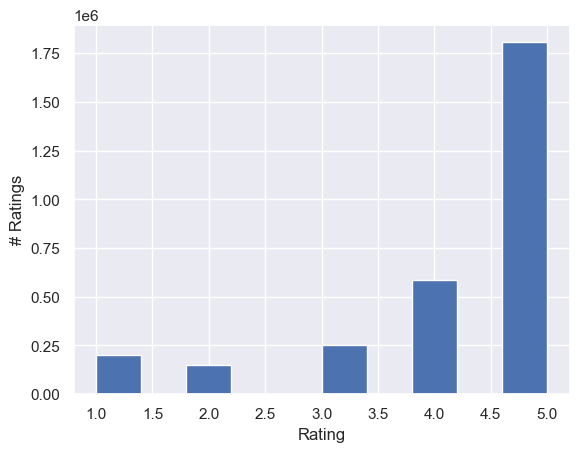

In [44]:
plt.hist(ratings['review/score'])
plt.xlabel('Rating')
plt.ylabel('# Ratings')
plt.show()

### Let's see how the ratings are spread across the books. First, we will analyze the top 20 books that have the most ratings

In [45]:
num_ratings_by_book = ratings.groupby('Title')['review/score'].agg('count').sort_values( ascending=False)

In [46]:
num_ratings_by_book_subset = num_ratings_by_book.head(20)

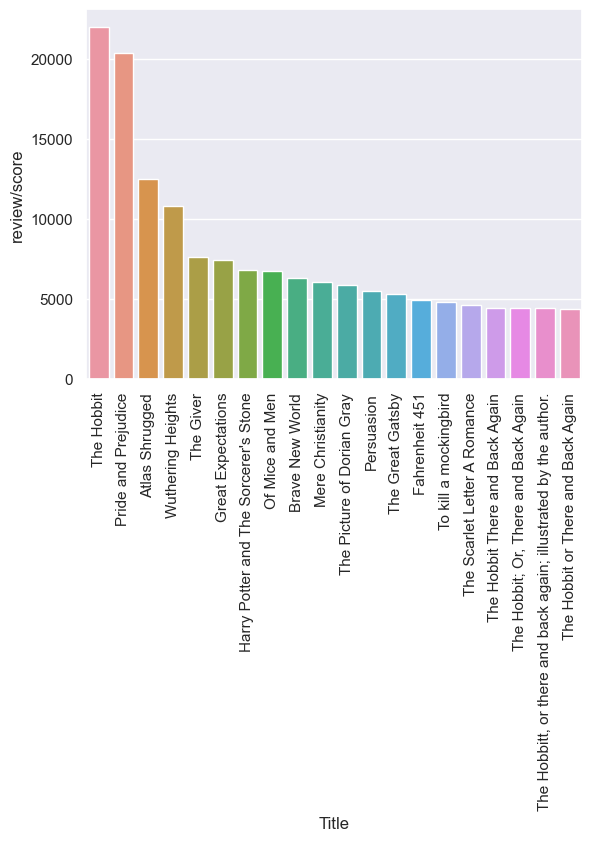

In [47]:
sns.barplot(x = num_ratings_by_book_subset.index, y = num_ratings_by_book_subset);
plt.xticks(rotation=90);

### The top four have clearly the highest number of ratings than the rest. 

### Let's see also what books have the least number of ratings/reviews 

In [48]:
num_ratings_by_book.tail()

Title
In Darwin's Wake: Revisiting Beagle's South American Anchorages.                                                                      1
In Darkest Germany                                                                                                                    1
In Darkest Africa or the Quest Rescue and Retreat of Emin, Governor of Equatoria: Volume 1                                            1
In Coronado's footsteps                                                                                                               1
The Life and Times of Jesus: As Told by Theophilus : A Collection of Stories and Parables in Narrative Form With Gospel References    1
Name: review/score, dtype: int64

### Now we will  plot the top 20 highest rated books

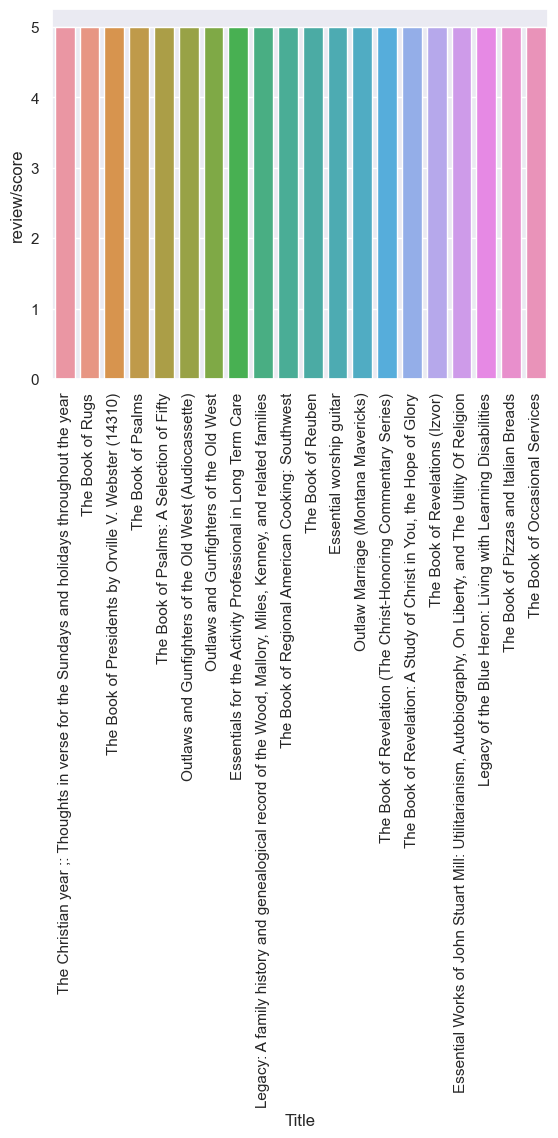

In [49]:
avg_ratings_by_book = ratings.groupby('Title')['review/score'].agg('mean').sort_values( ascending=False)
avg_ratings_by_book_t20 = avg_ratings_by_book.head(20)
sns.barplot(x = avg_ratings_by_book_t20.index, y = avg_ratings_by_book_t20);
plt.xticks(rotation=90);

### All top 20 books have got 5 rating, which is not surprising given we have many 5 star ratings in our dataset.

### Let's also analyze how ratings are provided. We will now analyze average number of ratings provided by users

In [50]:
ratings_user_group_by = ratings.groupby('User_id').count().sort_values(by="Id",ascending=False)
num_ratings_by_user = ratings_user_group_by['review/score'].astype(int)

In [51]:
num_ratings_by_user.describe()

count    1.008972e+06
mean     2.416532e+00
std      1.213263e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.795000e+03
Name: review/score, dtype: float64

In [52]:
num_ratings_by_user.value_counts(normalize=True)

review/score
1       6.875473e-01
2       1.436531e-01
3       5.549807e-02
4       3.123278e-02
5       1.708075e-02
            ...     
330     9.911078e-07
231     9.911078e-07
346     9.911078e-07
347     9.911078e-07
5795    9.911078e-07
Name: proportion, Length: 409, dtype: float64

#### We see most of the users have either written one review (~69%), or two reviews (14%) 

### Let's do ECDF analysis on this data

In [53]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)


    # x-data for the ECDF: x
    x = np.sort(data)


    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n


    return x, y

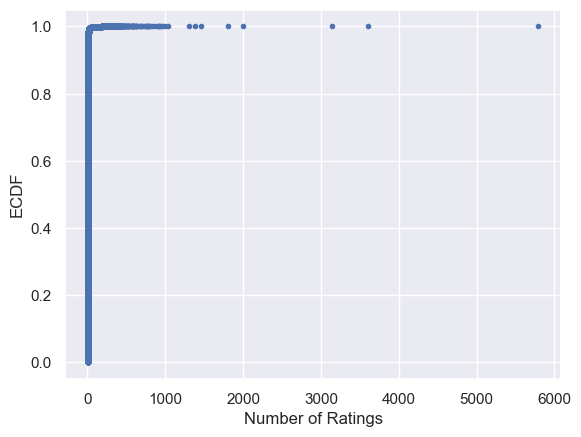

In [54]:
x_vers, y_vers = ecdf(ratings_user_group_by['review/score'])

# Generate plot
plt.plot (x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
plt.xlabel('Number of Ratings')
plt.ylabel('ECDF')

# Display the plot
plt.show()

As expected, only review dominates and then there are a few outliers. 
 

### Moving our focus now from ratings to the book dataset. 

#### Let's see how many different categories of books are there

In [55]:
books.categories.value_counts(normalize=1)

categories
['Fiction']                               0.136789
['Religion']                              0.055250
['History']                               0.054496
['Juvenile Fiction']                      0.038801
['Biography & Autobiography']             0.036938
                                            ...   
['Authors, Japanese']                     0.000006
['Birth certificates']                    0.000006
['Restaurant management']                 0.000006
['Oxford (England)']                      0.000006
['Flame in the wind (Motion picture)']    0.000006
Name: proportion, Length: 10883, dtype: float64

In [56]:
len(books.categories.value_counts())

10883

#### We have 10883 different categories of books
#### Let's plot a pie chart showing how books are spread across top 10 categories

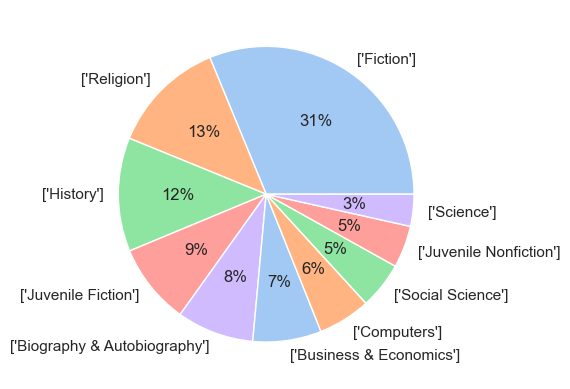

In [57]:
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(books.categories.value_counts().head(10), labels = books.categories.value_counts().head(10).index,colors = colors, autopct='%.0f%%')
plt.show()

#### Clearly, the category Fiction has the largest number of the books

##### We do see a few categories that may not be correct. For example, 'Oxford (England)', looks more like a publisher and 'Flame in the wind (Motion picture)' feels more like a movie name rather than a category

Let's find out how many books are alone in their category

In [58]:
sum(books.categories.value_counts() == 1)

6535

#### We do have a large number of books that are the only ones in their category. Clearly we have a lot of scope to reduce our dataset as many of such entries may not help in building a recommendation system, but we will do that later. 

#### We will now merge the databases to generate further insights from the data

In [59]:
books_merged = pd.merge(books,ratings,on = 'Title')

In [60]:
books_merged.shape

(2999792, 14)

In [61]:
books_merged.head()

,Title,description,authors,publisher,publishedDate,categories,Id,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],NaN,1996,['Comics & Graphic Novels'],1882931173,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],0826414346,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],0826414346,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],0826414346,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],0826414346,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


### We have in total close to ~3 MM records. Now, first we will remove duplicates and then we will now focus on removing columns that will not be used in building a recommendation system.

In [62]:
books_merged.drop_duplicates(inplace = True)

For the recommender system, we may not need the columns - Id (it is not an integer rather than a string), profileName, review/helpfulness, review/time, publisher, and published date. Publisher and published date may play a role in generating a recommendation but that may only happen in a few cases and thus we will leave that out in our analysis

In [63]:
books_merged = books_merged.drop(['Id', 'profileName', 'review/helpfulness', 'review/time', 'publisher', 'publishedDate'], axis = 1)

In [64]:
books_merged.head()

,Title,description,authors,categories,User_id,review/score,review/summary,review/text
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],['Comics & Graphic Novels'],AVCGYZL8FQQTD,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography'],A30TK6U7DNS82R,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography'],A3UH4UZ4RSVO82,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography'],A2MVUWT453QH61,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography'],A22X4XUPKF66MR,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [65]:
books_merged.isna().sum()

Title                  0
description       638106
authors           389373
categories        549471
User_id           558546
review/score           0
review/summary       407
review/text            8
dtype: int64

### That is all for now. We still do have a lot of null values but we won't remove any of those till we have more clarity on the kind of model we plan to build and the data that will be needed for the model.

We will now save the merged data in a file for further analysis

In [33]:
books_merged.to_csv("../data/interim/merged_data.csv", index=False)